<a href="https://colab.research.google.com/github/RitaDCassia/data_analysis/blob/main/exercicio_analise_dados_tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import statistics as sts
import pandas as pd
import seaborn as sb

In [45]:
# importando dados
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [46]:
dataset.shape

(14, 5)

In [47]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Text(0.5, 1.0, 'Aparencia')

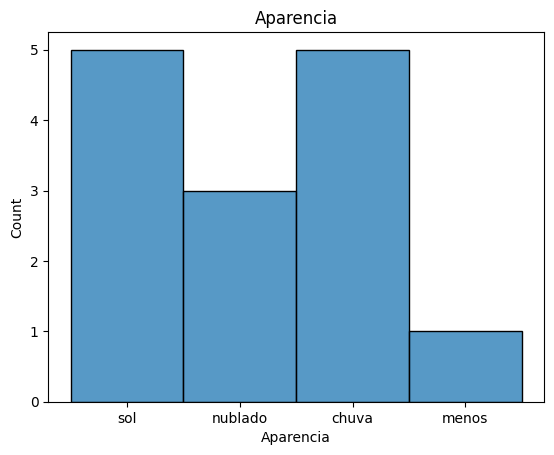

In [48]:
sb.histplot(dataset['Aparencia']).set_title('Aparencia')

In [49]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

In [50]:
print(dataset.groupby(['Aparencia']).size())

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64


In [51]:
print(dataset.groupby(['Temperatura']).size())

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64


In [52]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

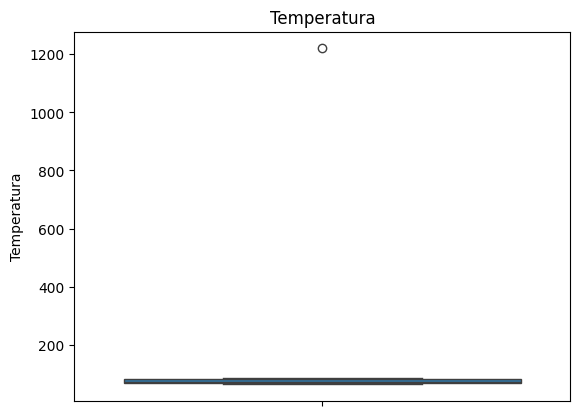

In [53]:
sb.boxplot(dataset['Temperatura']).set_title('Temperatura')

<ipython-input-54-6574cc5eee20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

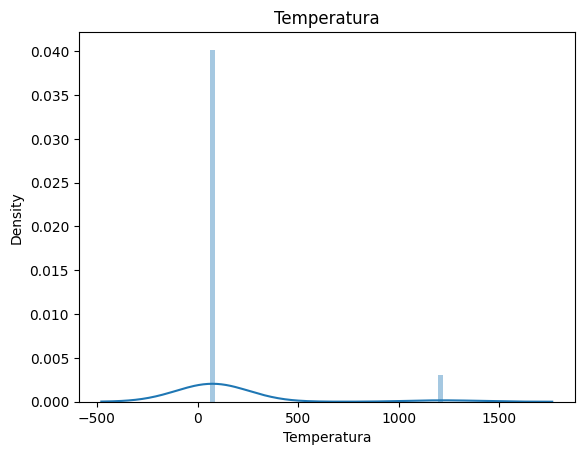

In [54]:
sb.distplot(dataset['Temperatura']).set_title('Temperatura')

In [55]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [56]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [57]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [58]:
print(dataset.groupby(['Temperatura']).size())

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64


In [59]:
print(dataset.groupby(['Umidade']).size())

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64


In [60]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [61]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [62]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [63]:
print(dataset.groupby(['Umidade']).size())

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64


In [64]:
print(dataset.groupby(['Jogar']).size())

Jogar
nao    5
sim    9
dtype: int64


In [66]:
dataset['Umidade'].isnull().sum()

1

In [70]:
dataset['Umidade'].fillna(mediana, inplace = True)

In [71]:
dataset['Umidade'].isnull().sum()

0

In [72]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [74]:
print(dataset.groupby(['Vento']).size())

Vento
FALSO         7
VERDADEIRO    6
dtype: int64


In [75]:
dataset['Vento'].fillna('FALSO', inplace = True)

In [76]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [77]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [78]:
dataset.shape

(14, 5)